# Sentiment Analysis on IMDb Movie Reviews using Bernoulli Naive Bayes

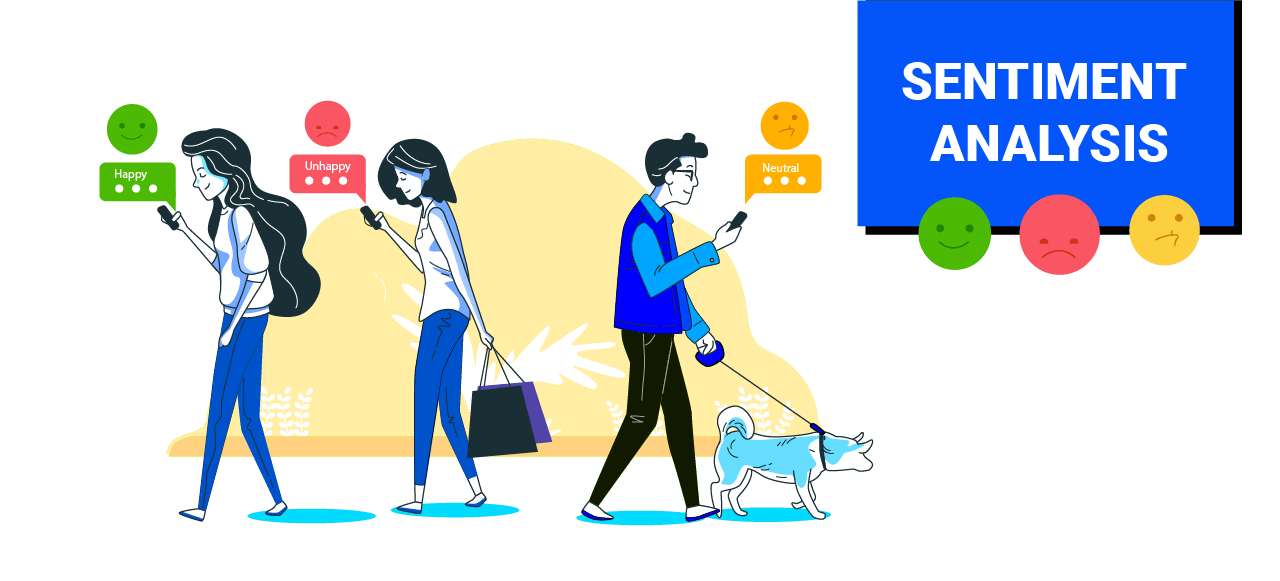

- Dataset: [IMDb Movie Reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [1]:
#Import libreries 

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm
import pickle


from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix




import missingno as msno

import warnings
warnings.filterwarnings('ignore')  # to avoud warnings

## 1. Data Importation:

- Import the IMDb Movie Reviews dataset.
- Understand the sentiment-labeled movie reviews and features.
____

In [2]:
#Import dataset 

df = pd.read_csv("Datasets/IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
#Convert into dataframe 

df = pd.DataFrame(df)

### 2. Data Preprocessing:

- Preprocess text data, handle missing values, and convert to a binary format.
- Prepare the dataset for sentiment analysis.

___________

- Preprocess text data, handle missing values, and convert to a binary format.

In [4]:
#labelling : positive -> 1 , negative -> 0 

df['sentiment'] = [1 if col =="positive" else 0 if col =="negative" else None for col in df['sentiment']]

In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [6]:
#shape

df.shape

(50000, 2)

In [7]:
df['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

missing values : 
 review       0
sentiment    0
dtype: int64


<Axes: >

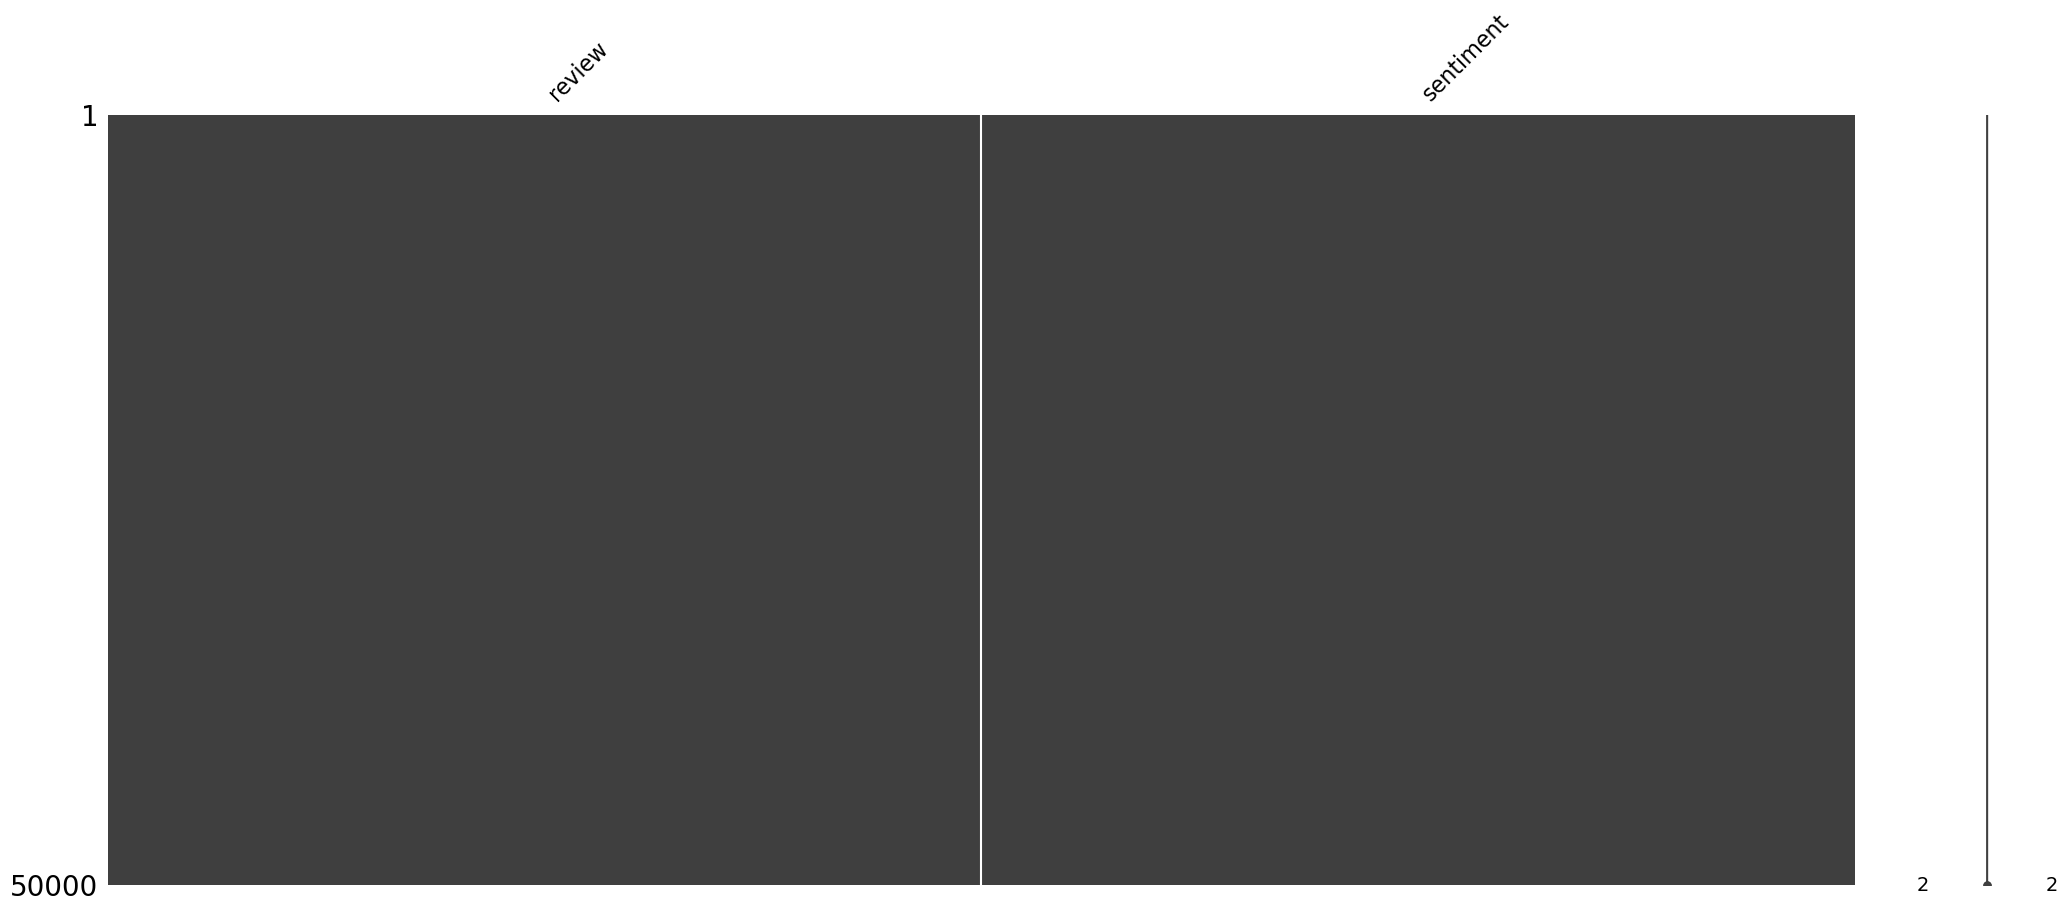

In [8]:
#Missing values
print("missing values : \n",df.isnull().sum())

msno.matrix(df)

**NO MISSING VALUES !**

- Prepare the dataset for sentiment analysis.

In [9]:
#Seprare features and target 

X = df.drop('sentiment', axis=1)
y = df['sentiment']

#### Text Preprocessing Steps

Text data preprocessing is a crucial step in natural language processing (NLP) and machine learning tasks. It involves several key steps to prepare raw text data for analysis and modeling. Here's a brief description of each step:

| Step | Process | Description |
|------|---------|-------------|
| 1    | Text Preprocessing | - **Lowercasing:** Convert all text to lowercase for uniformity.<br>- **Encoding:** Convert text into a suitable encoding format, such as Unicode. |
| 2    | Tokenization | - **Tokenization:** Break the text into smaller units (tokens), such as words or phrases. |
| 3    | Cleaning | - **Removing Special Characters:** Eliminate unnecessary characters, symbols, or punctuation marks.<br>- **Handling Contractions:** Expand contractions for consistency.<br>- **Removing HTML Tags:** Eliminate HTML tags from the text.<br>- **Handling URLs:** Remove or replace URLs. |
| 4    | Stemming | - **Stemming:** Reduce words to their root form by removing suffixes. |
| 5    | Stopwords | - **Removing Stopwords:** Eliminate common words that do not carry significant meaning. |
| 6    | Lemmatization | - **Lemmatization:** Reduce words to their base or dictionary form for more meaningful analysis. |

##### Example:

Consider the following sentence: "The quick brown fox jumps over the lazy dog."

After applying the text preprocessing steps:

| Step | Process | Result |
|------|---------|--------|
| 1    | Text Preprocessing | The quick brown fox jumps over the lazy dog. |
| 2    | Tokenization | ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'] |
| 3    | Cleaning | ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog'] |
| 4    | Stemming | ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog'] |
| 5    | Stopwords | ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog'] |
| 6    | Lemmatization | ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog'] |

These preprocessing steps help transform the original sentence into a more structured and meaningful representation.


In [10]:
# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

#Convert X to string
X = X.applymap(str)

# Function to remove HTML tags from a string using regular expressions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)


X = X.applymap(remove_html_tags)

# Tokenization with tqdm progress bar
tqdm.pandas()
tokens = X.progress_applymap(word_tokenize)

# Convert to lowercase with tqdm progress bar
tqdm.pandas()
tokens = tokens.progress_applymap(lambda x: [token.lower() for token in x])

# Remove stopwords with tqdm progress bar
tqdm.pandas()
stop_words = set(stopwords.words('english'))
tokens = tokens.progress_applymap(lambda x: [token for token in x if token not in stop_words])

# Stemming with tqdm progress bar
tqdm.pandas()
stemmer = PorterStemmer()
tokens = tokens.progress_applymap(lambda x: [stemmer.stem(token) for token in x])

# Resulting tokens after preprocessing
df['ProcessedText'] = tokens

print(df['ProcessedText'])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leondoungala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leondoungala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 50000/50000 [02:02<00:00, 407.16it/s]


0        [one, review, mention, watch, 1, oz, episod, '...
1        [wonder, littl, product, ., film, techniqu, un...
2        [thought, wonder, way, spend, time, hot, summe...
3        [basic, 's, famili, littl, boy, (, jake, ), th...
4        [petter, mattei, 's, ``, love, time, money, ''...
                               ...                        
49995    [thought, movi, right, good, job, ., n't, crea...
49996    [bad, plot, ,, bad, dialogu, ,, bad, act, ,, i...
49997    [cathol, taught, parochi, elementari, school, ...
49998    ['m, go, disagre, previou, comment, side, malt...
49999    [one, expect, star, trek, movi, high, art, ,, ...
Name: ProcessedText, Length: 50000, dtype: object


In [11]:
df.head()

,review,sentiment,ProcessedText
0,One of the other reviewers has mentioned that ...,1,"[one, review, mention, watch, 1, oz, episod, '..."
1,A wonderful little production. <br /><br />The...,1,"[wonder, littl, product, ., film, techniqu, un..."
2,I thought this was a wonderful way to spend ti...,1,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,0,"[basic, 's, famili, littl, boy, (, jake, ), th..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[petter, mattei, 's, ``, love, time, money, ''..."


- Vectorize Text Data and Split Data:

Divide the data into training and testing sets.
Use TF-IDF (Term Frequency-Inverse Document Frequency) to vectorize the text data.


In [12]:

# Convert the 'ProcessedText' column to strings (it's a list)
X = df['ProcessedText'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize
tfidf_vectorizer = TfidfVectorizer()  

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert the TF-IDF matrices to DataFrames
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [13]:
# Save split dataset 

with open('Datasets/Splits/X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)
    
with open('Datasets/Splits/X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)
    
with open('Datasets/Splits/y_train.pkl', 'wb') as file:
    pickle.dump(y_train, file)

with open('Datasets/Splits/y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

In [14]:
X_train_tfidf_df[1:2]

,00,000,00000000000,00000001,00001,00015,000dm,001,003830,007,...,ünel,ünfaith,üvegtigri,üzümcü,ýs,þorleifsson,þór,żmijewski,יגאל,כרמון
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Algorithm: Bernoulli Naive Bayes for Sentiment Analysis

- Implement Bernoulli Naive Bayes for sentiment analysis.
- Train the model on the preprocessed IMDb Movie Reviews dataset.

______

- Implement **Bernoulli Naive Bayes** for sentiment analysis.

In [15]:
# Define the BernoulliNB model
model = BernoulliNB()

# Train the model with a progress bar
with tqdm(total=len(X_train_tfidf_df), desc="Training Progress") as pbar:
    model.fit(X_train_tfidf_df, y_train)
    pbar.update(len(X_train_tfidf_df))


Training Progress: 100%|██████████| 40000/40000 [03:06<00:00, 213.92it/s]


In [16]:
# Predict with a progress bar

with tqdm(total=len(X_test_tfidf_df), desc="Prediction Progress") as pbar:
    y_pred = model.predict(X_test_tfidf_df)
    pbar.update(len(X_test_tfidf_df))

Prediction Progress: 100%|██████████| 10000/10000 [00:40<00:00, 248.65it/s]


In [21]:
# Predict the outcome from this sample

sample_to_predict = X_test_tfidf_df[1:2]
model.predict(sample_to_predict)

array([1])

## Sentiment Analisis 1: Positive , Good  Job!

In [22]:
# Predict the outcome from this sample

sample_to_predict_2 = X_test_tfidf_df[2:3]
model.predict(sample_to_predict_2)

array([0])

## Sentiment Analisis 2: Negative , Oppsss Sorry !

- Model Evaluation

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  
recall = recall_score(y_test, y_pred, average='binary')  
f1 = f1_score(y_test, y_pred, average='binary')  


# Print the results
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1 Score: {f1:.4f}")


- Accuracy: 0.8467
- Precision: 0.8684
- Recall: 0.8200
- F1 Score: 0.8435


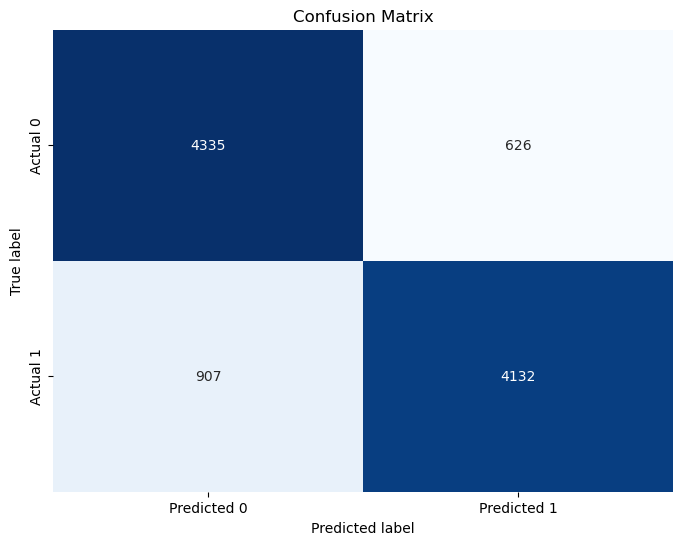

In [24]:
#Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
